In [10]:
from simulation import *

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [441, 80, 382, 159, 352] 
Slist :  [129]


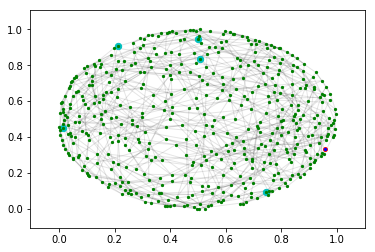

In [32]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 5
propagProba = 0.9
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100



Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

figureList.append(fig1)

Starting infection


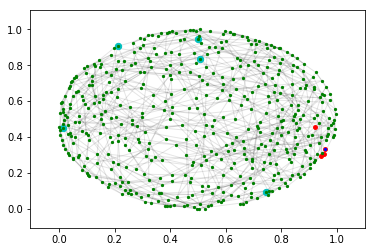

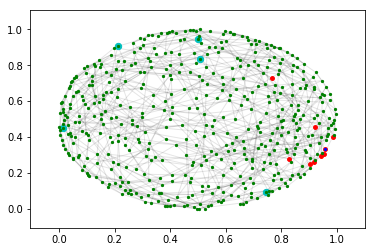

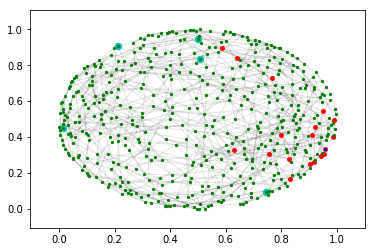

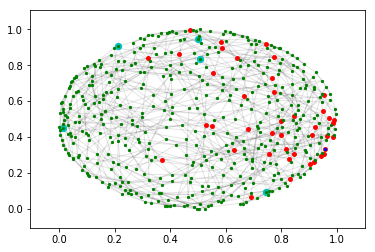

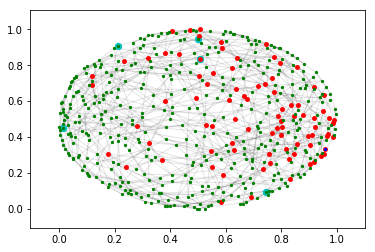

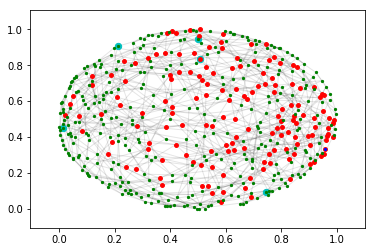

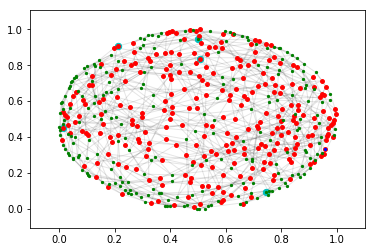

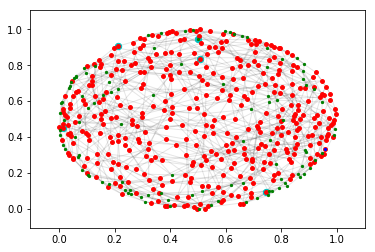

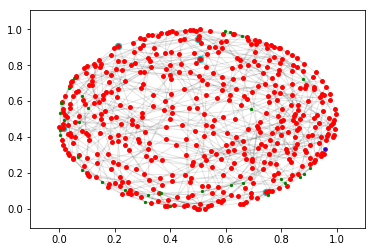

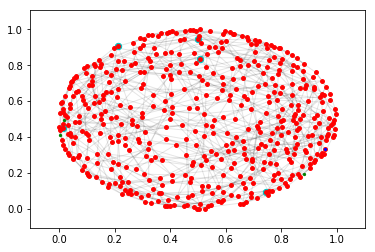

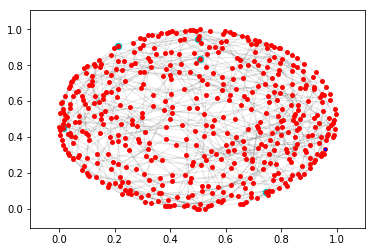

In [33]:
print("Starting infection")
infections = [[] for n in range(numRumors)]


j = 0
infected = getInfectedList(Graph,numRumors)

while(len(infected)<len(Graph.nodes())):
    

    Graph = infectionForward(Graph, propagProba, numRumors)
    
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)

    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

    j += 1
    infected = getInfectedList(Graph,numRumors)

In [34]:
def findSet(myG,mySourceNode,myRadius):
    possible_set = list()
    curSet = findNeighDegN(myG,mySourceNode,myRadius)

    return  curSet

sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    if rumorSources[0] in set1:
        print('IN')
        print('NOT IN')
print(set.intersection(*sets))

IN
NOT IN
IN
NOT IN
IN
NOT IN
IN
NOT IN
set()


In [27]:
print(monitorTrigger)
print(rumorSources)

[(185, 1, 7), (412, 1, 7), (470, 1, 6), (499, 1, 3)]
[112]
